In [3]:
import numpy
numpy.version.full_version

'1.16.5'

In [4]:
import numpy as np
a=np.array([2,324,23,4243,2,342,34,34])
a

array([   2,  324,   23, 4243,    2,  342,   34,   34])

In [5]:
a.ndim

1

In [6]:
a.shape

(8,)

In [7]:
b=a.reshape((4,2))
b

array([[   2,  324],
       [  23, 4243],
       [   2,  342],
       [  34,   34]])

In [8]:
b.ndim
b.shape

(4, 2)

In [9]:
b[1][0]=97
b

array([[   2,  324],
       [  97, 4243],
       [   2,  342],
       [  34,   34]])

In [10]:
a

array([   2,  324,   97, 4243,    2,  342,   34,   34])

In [11]:
c=a.reshape((2,4)).copy()


In [12]:
c[0][0]=92929
c

array([[92929,   324,    97,  4243],
       [    2,   342,    34,    34]])

In [13]:
a

array([   2,  324,   97, 4243,    2,  342,   34,   34])

In [14]:
a**2

array([       4,   104976,     9409, 18003049,        4,   116964,
           1156,     1156], dtype=int32)

In [15]:
a*2

array([   4,  648,  194, 8486,    4,  684,   68,   68])

In [16]:
a[np.array([0,5,3])]

array([   2,  342, 4243])

In [17]:
a>4

array([False,  True,  True,  True, False,  True,  True,  True])

In [18]:
a[a>4]

array([ 324,   97, 4243,  342,   34,   34])

In [19]:
a.clip(0,4)

array([2, 4, 4, 4, 2, 4, 4, 4])

In [20]:
a

array([   2,  324,   97, 4243,    2,  342,   34,   34])

In [21]:
c[c>10]=10
c

array([[10, 10, 10, 10],
       [ 2, 10, 10, 10]])

In [23]:
c = np.array([5, 4, np.NAN, 44,56])
c

array([ 5.,  4., nan, 44., 56.])

In [24]:
np.isnan(c)

array([False, False,  True, False, False])

In [25]:
c[~np.isnan(c)]

array([ 5.,  4., 44., 56.])

In [26]:
np.mean(c[~np.isnan(c)])

27.25

In [27]:
import timeit
normal_py_sec = timeit.timeit('sum(x*x for x in range(1000))', number=10000)
naive_np_sec = timeit.timeit('sum(na*na)',
setup="import numpy as np; na=np.arange(1000)",number=10000)
good_np_sec = timeit.timeit('na.dot(na)',
setup="import numpy as np; na=np.arange(1000)",number=10000)
print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 0.816733 sec
Naive NumPy: 0.749947 sec
Good NumPy: 0.011738 sec


In [28]:
a = np.array([1,2,3])
a.dtype

dtype('int32')

In [29]:
np.array([1, "stringy"])

array(['1', 'stringy'], dtype='<U11')

In [30]:
np.array([1, "stringy", set([1,2,3])])

array([1, 'stringy', {1, 2, 3}], dtype=object)

In [31]:
import scipy, numpy
scipy.version.full_version

'1.3.1'

In [32]:
scipy.dot is numpy.dot

True

In [34]:
import scipy as sp
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")
print(data[:10])

[[1.00000000e+00 2.27333106e+03]
 [2.00000000e+00 1.65725549e+03]
 [3.00000000e+00            nan]
 [4.00000000e+00 1.36684644e+03]
 [5.00000000e+00 1.48923438e+03]
 [6.00000000e+00 1.33802002e+03]
 [7.00000000e+00 1.88464734e+03]
 [8.00000000e+00 2.28475415e+03]
 [9.00000000e+00 1.33581091e+03]
 [1.00000000e+01 1.02583240e+03]]


In [35]:
x = data[:,0]
y = data[:,1]

In [36]:
sp.sum(sp.isnan(y))

8

In [37]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

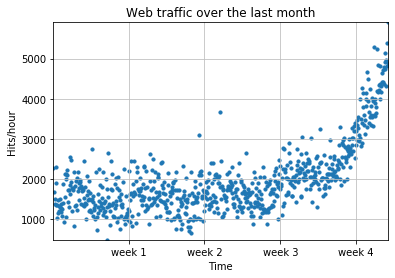

In [39]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')

plt.show()

In [40]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

In [41]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print("Model parameters: %s" % fp1)

Model parameters: [  2.58462016 996.50674246]


In [42]:
print(residuals)

[3.19531507e+08]


In [45]:
# f(x) = 2.59619213 * x + 989.02487106.
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

319531507.0208318


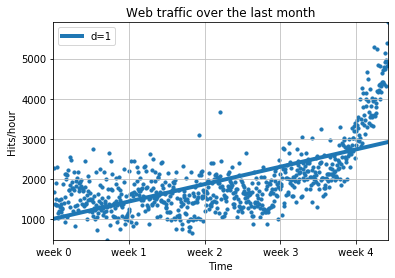

In [48]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")

In [49]:
f2p = sp.polyfit(x, y, 2)
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

181347660.7576103


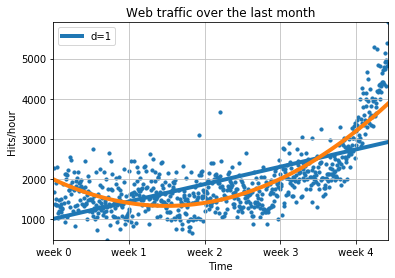

In [50]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
f2p = sp.polyfit(x, y, 2)
f2 = sp.poly1d(f2p)
plt.plot(fx, f2(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned


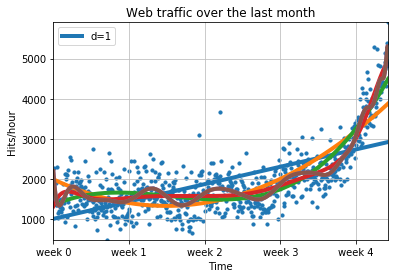

In [53]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
f2p = sp.polyfit(x, y, 2)
f2 = sp.poly1d(f2p)
plt.plot(fx, f2(fx), linewidth=4)
f3p = sp.polyfit(x, y, 3)
f3 = sp.poly1d(f3p)
plt.plot(fx, f3(fx), linewidth=4)
f10p = sp.polyfit(x, y, 10)
f10 = sp.poly1d(f10p)
plt.plot(fx, f10(fx), linewidth=4)
f53p = sp.polyfit(x, y, 53)
f53 = sp.poly1d(f53p)
plt.plot(fx, f53(fx), linewidth=4)
f100p = sp.polyfit(x, y, 100)
f100 = sp.poly1d(f100p)
plt.plot(fx, f100(fx), linewidth=4)


plt.legend(["d=%i" % f1.order], loc="upper left")

In [57]:

inflection = int(3.5*7*24)
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=134390576.312955


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned


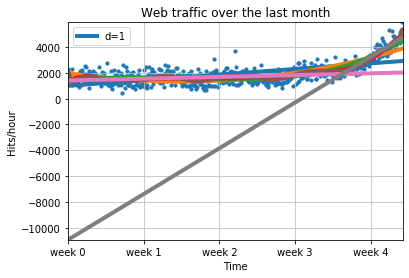

In [61]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.75')
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
f2p = sp.polyfit(x, y, 2)
f2 = sp.poly1d(f2p)
plt.plot(fx, f2(fx), linewidth=4)
f3p = sp.polyfit(x, y, 3)
f3 = sp.poly1d(f3p)
plt.plot(fx, f3(fx), linewidth=4)
f10p = sp.polyfit(x, y, 10)
f10 = sp.poly1d(f10p)
plt.plot(fx, f10(fx), linewidth=4)
f53p = sp.polyfit(x, y, 53)
f53 = sp.poly1d(f53p)
plt.plot(fx, f53(fx), linewidth=4)
f100p = sp.polyfit(x, y, 100)
f100 = sp.poly1d(f100p)
plt.plot(fx, f100(fx), linewidth=4)
inflection = int(3.5*7*24)
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
plt.plot(fx, fa(fx), linewidth=4)
plt.plot(fx, fb(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")